# Visualize the dataset

In [2]:
# Import packages
from tqdm import tqdm
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px
# !{sys.executable} -m pip install plotly

In [3]:
df = pd.read_csv('data/raw_data/combined.csv',delimiter=",")
print(df.shape)

(82076, 6)


## Statistics

In [4]:
# Na-values
df.isna().sum()

id                0
country           0
name              0
NACE           5997
description    1822
text              4
dtype: int64

In [12]:
# Different countries
print(len(df['country'].unique()))
print(df['country'].unique())

48
['SE' 'DK' 'FI' 'NO' 'US' 'JP' 'CN' 'AU' 'GB' 'BM' 'CA' 'AT' 'LU' 'IN'
 'FR' 'IT' 'SG' 'JE' 'ID' 'TR' 'PL' 'TH' 'BR' 'DE' 'IL' 'HK' 'CH' 'NZ'
 'MX' 'BE' 'RU' 'IM' 'PT' 'KR' 'MY' 'NL' 'ES' 'KY' 'EE' 'PA' 'IE' 'ZA'
 'PH' 'VG' 'GR' 'HU' 'LT' 'GG']


In [10]:
len(df['id']) - len(df['id'].unique())

1130

In [7]:
len(df) - len(df['text'].unique())

9460

In [11]:
len(df) - len(df['description'].unique())

11737

## Countries

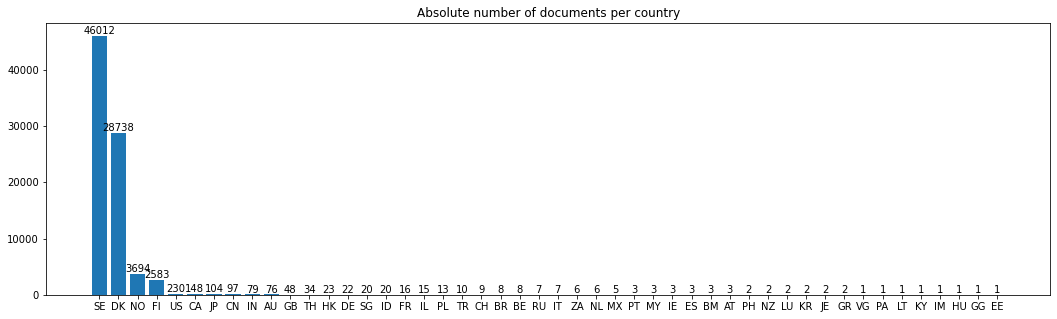

In [33]:

pivot = df['country'].astype(str).value_counts()
# print(sum(pivot.values))
# print(sum(pivot.values[:4]/sum(pivot.values)))
# print(pivot)

a = sorted(zip(pivot.values,pivot.index),reverse=True)


f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(zip(*a))[1],list(zip(*a))[0])
plt.title("Absolute number of documents per country")
for bars in ax.containers:
    ax.bar_label(bars)

plt.savefig('graphs/country-pivot.svg')
plt.show()

### Outside / in europe

0.9891563916370193


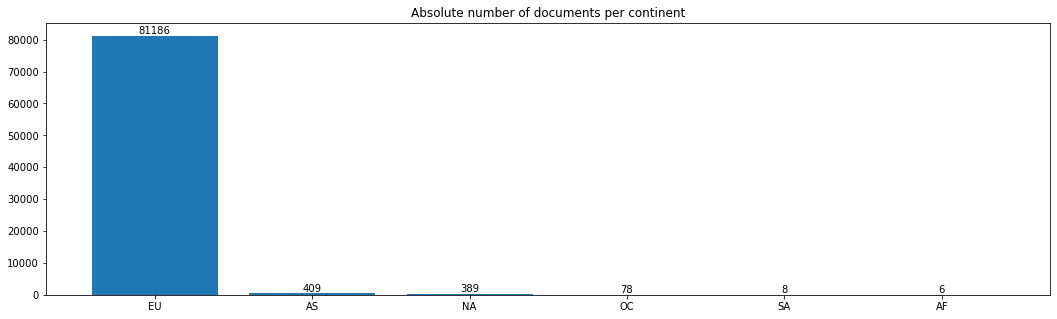

In [34]:
import json
f = open('util/continent_codes.json')
continent_codes = json.load(f)

continents = [continent_codes[c] for c in df['country']]
df['continent'] = continents

pivot = df['continent'].astype(str).value_counts()

print(pivot.values[0]/sum(pivot.values))

a = sorted(zip(pivot.values,pivot.index),reverse=True)

f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(zip(*a))[1],list(zip(*a))[0])
plt.title("Absolute number of documents per continent")
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


## Visualize word and character count of the text

In [35]:
def wordCount(text, max_words = np.inf):
    num = len(str(text).split())
    return max_words if num > max_words else num

def charCount(text, max_chars = np.inf):
    num = len(str(text))
    return max_chars if num > max_chars else num

def countWordsAndCharacters(dataf, col_name, max_words = np.inf, max_chars = np.inf):
    wc = []
    cc = []
    for _, row in dataf.iterrows():
        wc.append(wordCount(row[col_name], max_words))
        cc.append(charCount(row[col_name], max_chars))
    return (wc,cc)


In [36]:
# Get median and mean of the number of words and characters
wc,cc = countWordsAndCharacters(df, 'description')

print("DESCRIPTION")
print("Num words has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(wc),np.median(wc),np.std(wc)))
print("Num chars has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(cc),np.median(cc),np.std(cc)))
print(f"Words - min: {min(wc)}, max:{max(wc)}")
print(f"Chars - min: {min(cc)}, max:{max(cc)}")

Num words has mean: 22.94 and median: 19 with std 34.06
Num chars has mean: 159.38 and median: 129 with std 232.72
Words - min: 1, max:3170
Chars - min: 1, max:24232


In [38]:
# Get median and mean of the number of words and characters
wc,cc = countWordsAndCharacters(df, 'text')

print("TEXT")
print("Num words has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(wc),np.median(wc),np.std(wc)))
print("Num chars has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(cc),np.median(cc),np.std(cc)))
print(f"Words - min: {min(wc)}, max:{max(wc)}")
print(f"Chars - min: {min(cc)}, max:{max(cc)}")

TEXT
Num words has mean: 575.76 and median: 22 with std 1662.01
Num chars has mean: 3786.99 and median: 150 with std 10696.98
Words - min: 1, max:174567
Chars - min: 1, max:1027535


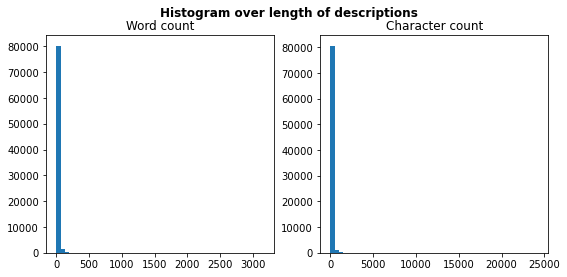

In [56]:
# With no max cap
wc,cc = countWordsAndCharacters(df, 'description')

fig, axs = plt.subplots(1,2,figsize=(9,4))
axs[0].hist(wc, bins=50)
axs[1].hist(cc, bins=50)

fig.suptitle("Histogram over length of descriptions",fontweight='semibold')
axs[0].set_title('Word count')
axs[1].set_title('Character count')

plt.show()

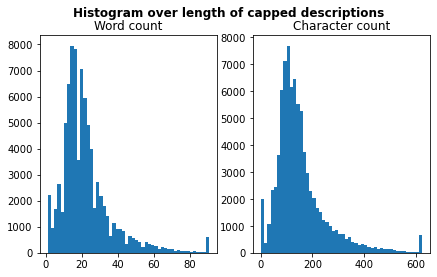

In [58]:
# With a max word cap of 100 and max chars at 1000
wc,cc = countWordsAndCharacters(dataf=df, col_name='description', max_words=22.94+2*34, max_chars=159.38+2*232.72)

fig, axs = plt.subplots(1,2,figsize=(7,4))
axs[0].hist(wc, bins=50)
axs[1].hist(cc, bins=50)

fig.suptitle("Histogram over length of capped descriptions",fontweight='semibold')
axs[0].set_title('Word count')
axs[1].set_title('Character count')

plt.show()

In [63]:
# How many words will be removed because they have more than 100 words
wc = np.array(wc)
len(wc[(22.94+2*34) < wc])

0

## NACE codes

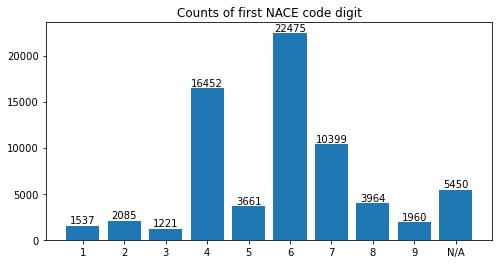

In [129]:
# Get how many companies have the same first number of NACE code, n=NaN
pivot = df['NACE'].astype(str).str[0].value_counts()
#print(pivot)
a = sorted(zip(pivot.index,pivot.values))
a[-1] = ('N/A',a[-1][1])

f, ax = plt.subplots(figsize=(8,4))

plt.bar(list(zip(*a))[0],list(zip(*a))[1])

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Counts of first NACE code digit")
plt.show()


AttributeError: 'tuple' object has no attribute 'patches'

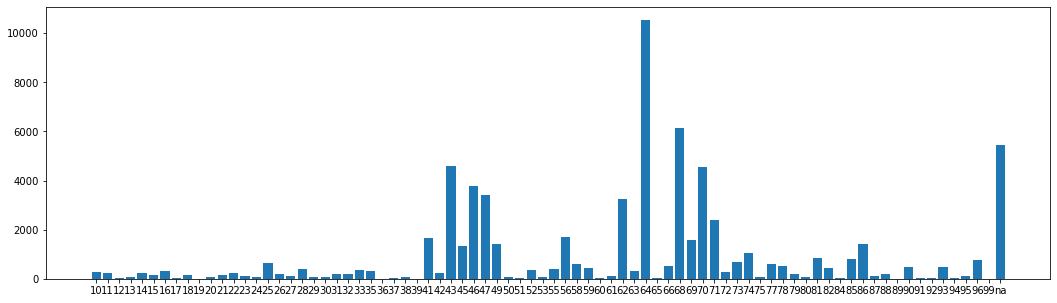

In [108]:
# Get how many companies have the same first TWO numbers of NACE code, n=NaN
pivot = df['NACE'].astype(str).str[:2].value_counts()
#print(pivot)

f, ax = plt.subplots(figsize=(18,5))
a = sorted(zip(pivot.index,pivot.values))
plt.bar(list(zip(*a))[0],list(zip(*a))[1])

plt.show()

In [31]:
# Get how many companies have the same number of digits in their NACE code
pivot = list(df['NACE'].astype(str).str.len())

keys = set(pivot)
unique = dict(zip(keys, [0]*len(keys)))

for i in pivot:
    unique[i] += 1

# Nan values have length 3, others are on the format: '7022.0', '210.0'
print(unique)

{3: 5997, 5: 1355, 6: 74724}


In [94]:
x = np.unique(df['NACE'].tolist())
x = x[~np.isnan(x)]
x = np.unique(x)

In [96]:
len(x)

635

# Cleaned data

In [97]:
df = pd.read_csv('data/processed_data/cleaned.csv',delimiter=",")
print(df.shape)

(69204, 7)
